In [2]:
# imports
import pandas as pd
from selenium import webdriver
from os import path
from PIL import Image
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator
import matplotlib.pyplot as plt
from wordcloud import STOPWORDS

import nltk
#nltk.download()

In [7]:
# importing dataset
dataset = pd.read_csv('spotify_data.csv')

# dataframe from the 5 highest value of pop
top_songs = dataset.nlargest(5, 'pop')

# selects the titles and artists and makes two lists
top_songs_title = top_songs.iloc[:,0].tolist()
top_songs_artists = top_songs.iloc[:,1].tolist()

# creates a dict from the two lists
new_dict = dict(zip(top_songs_title, top_songs_artists))

print(new_dict)
top_songs

{'Sweater Weather': 'The Neighbourhood', 'Another Love': 'Tom Odell', 'Lost': 'Frank Ocean', 'Locked out of Heaven': 'Bruno Mars', 'Believer': 'Imagine Dragons'}


,title,artist,top genre,year released,added,bpm,nrgy,dnce,dB,live,val,dur,acous,spch,pop,top year,artist type
391,Sweater Weather,The Neighbourhood,modern alternative rock,2013,2020‑06‑11,124,81,61,-3,10,40,240,5,3,95,2013,Band/Group
393,Another Love,Tom Odell,chill pop,2013,2020‑06‑11,123,54,45,-9,9,13,244,70,4,94,2013,Solo
230,Lost,Frank Ocean,alternative r&b,2012,2020‑06‑22,123,60,91,-5,17,50,234,3,23,91,2012,Solo
315,Locked out of Heaven,Bruno Mars,dance pop,2012,2020‑06‑11,144,70,73,-4,31,87,233,5,4,91,2013,Solo
735,Believer,Imagine Dragons,modern rock,2017,2021‑01‑28,125,78,78,-4,8,67,204,6,13,91,2017,Band/Group


In [4]:
# url
url = 'https://www.azlyrics.com/'

# driver setup
driver = webdriver.Firefox(
executable_path=r'C:\Users\Robert Pallesen\OneDrive\Datamatiker\4. Semester\Python\docker_notebooks\venv\Lib\site-packages\selenium\webdriver\chrome\geckodriver.exe')

# opens url and maximises windows
driver.get(url)
driver.maximize_window()

# wait for and accept cookies
driver.implicitly_wait(3)
driver.find_element_by_xpath('//*[@id="onetrust-accept-btn-handler"]').click()

song_texts = []

for key, value in new_dict.items():

    # selects the search form
    elem = driver.find_element_by_xpath('//*[@id="q"]')

    # selects form
    elem.click()

    # types in the dict values in the form
    elem.send_keys(key, ' ', value)

    # submits form
    elem.submit()

    # clicks the top song
    driver.find_element_by_xpath('/html/body/div[2]/div/div/div[1]/table/tbody/tr[1]/td/a').click()

    # selects the text
    txt = driver.find_element_by_xpath('/html/body/div[2]/div/div[2]/div[5]').text

    # replaces '\n' with '' so we get a cleaner text
    txt.replace('\n', '')

    # prints song title and artist name
    print('-------------------------------------------------------------')
    print(key, value)
    print()
    # prints the song text
    print(txt)

    # adds the txt to song_text array
    song_texts.append(txt)

C:\Users\ROBERT~1\AppData\Local\Temp/ipykernel_26128/465934155.py:5: DeprecationWarning: executable_path has been deprecated, please pass in a Service object
  driver = webdriver.Firefox(
C:\Users\ROBERT~1\AppData\Local\Temp/ipykernel_26128/465934155.py:14: DeprecationWarning: find_element_by_xpath is deprecated. Please use find_element(by=By.XPATH, value=xpath) instead
  driver.find_element_by_xpath('//*[@id="onetrust-accept-btn-handler"]').click()
C:\Users\ROBERT~1\AppData\Local\Temp/ipykernel_26128/465934155.py:21: DeprecationWarning: find_element_by_xpath is deprecated. Please use find_element(by=By.XPATH, value=xpath) instead
  elem = driver.find_element_by_xpath('//*[@id="q"]')
C:\Users\ROBERT~1\AppData\Local\Temp/ipykernel_26128/465934155.py:33: DeprecationWarning: find_element_by_xpath is deprecated. Please use find_element(by=By.XPATH, value=xpath) instead
  driver.find_element_by_xpath('/html/body/div[2]/div/div/div[1]/table/tbody/tr[1]/td/a').click()
C:\Users\ROBERT~1\AppDat

-------------------------------------------------------------
Sweater Weather The Neighbourhood

All I am is a man
I want the world in my hands
I hate the beach but I stand
In California with my toes in the sand
Use the sleeves of my sweater
Let's have an adventure
Head in the clouds but my gravity's centered
Touch my neck and I'll touch yours
You in those little high waisted shorts, oh

She knows what I think about
And what I think about
One love, two mouths
One love, one house
No shirt, no blouse
Just us, you find out
Nothing that I wouldn't wanna tell you about, no

'Cause it's too cold for you here
And now, so let me hold
Both your hands in the holes of my sweater

And if I may just take your breath away
I don't mind if there's not much to say
Sometimes the silence guides a mind
To move to a place so far away
The goosebumps start to raise
The minute that my left hand meets your waist
And then I watch your face
Put my finger on your tongue
'Cause you love the taste, yeah
These heart

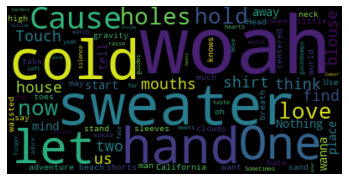

dict_keys(['woah', 'sweater', 'cold', 'hand', 'let', 'One', 'Cause', 'holes', 'love', 'now', 'hold', 'Touch', 'think', 'two', 'mouths', 'house', 'shirt', 'blouse', 'us', 'find', 'Nothing', 'wanna', 'tell', 'away', 'mind', 'place', 'start', 'man', 'want', 'world', 'hate', 'beach', 'stand', 'California', 'toes', 'sand', 'Use', 'sleeves', 'adventure', 'Head', 'clouds', 'gravity', 'centered', 'neck', 'little', 'high', 'waisted', 'shorts', 'oh', 'knows', 'may', 'take', 'breath', 'much', 'say', 'Sometimes', 'silence', 'guides', 'move', 'far', 'goosebumps', 'raise', 'minute', 'left', 'meets', 'waist', 'watch', 'face', 'Put', 'finger', 'tongue', 'taste', 'yeah', 'hearts', 'adore', 'Everyone', 'beats', 'hardest', 'Inside', 'warm', 'Outside', 'pour', "Comin'"])
<class 'wordcloud.wordcloud.WordCloud'>


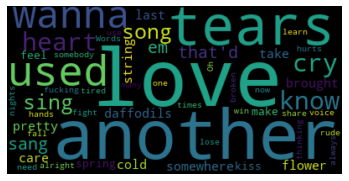

dict_keys(['love', 'another', 'tears', 'used', 'wanna', 'know', 'cry', 'heart', 'sing', 'song', "that'd", 'sang', 'em', 'take', 'somewhere', 'care', 'cold', 'brought', 'daffodils', 'pretty', 'string', 'flower', 'last', 'spring', 'kiss', 'make', 'feel', 'alright', 'tired', 'share', 'nights', 'somebody', 'hurts', 'fight', 'hands', 'broken', 'one', 'many', 'times', 'use', 'voice', 'fucking', 'rude', 'Words', 'always', 'win', 'lose', 'learn', 'Oh', 'need', 'now', 'thinking', 'fall'])
<class 'wordcloud.wordcloud.WordCloud'>


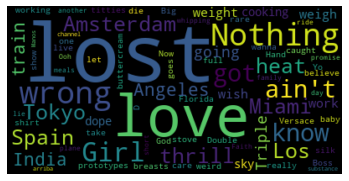

dict_keys(['lost', 'love', 'Nothing', 'wrong', 'Girl', 'got', 'know', "ain't", 'heat', 'thrill', 'Miami', 'Amsterdam', 'Tokyo', 'Spain', 'Los', 'Angeles', 'India', 'train', 'going', 'Triple', 'weight', 'weigh', 'work', 'wish', 'cooking', 'dope', 'sky', 'Double', 'D', 'Big', 'full', 'breasts', 'baby', 'Yo', 'Florida', 'wanna', 'Boss', 'working', 'take', 'care', 'Now', 'buttercream', 'silk', 'shirt', 'Versace', 'goes', 'one', 'God', 'prototypes', 'Hand', 'weird', 'live', 'rare', 'die', 'really', 'titties', 'show', 'let', 'caught', 'stove', 'believe', 'promise', 'whipping', 'meals', 'family', 'day', 'lie', 'Ooh', 'another', 'short', 'plane', 'ride', 'Faith', 'substance', 'Manos', 'arriba', 'channel'])
<class 'wordcloud.wordcloud.WordCloud'>


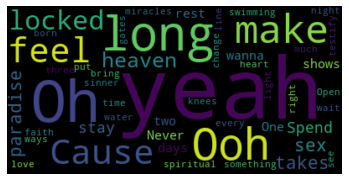

dict_keys(['yeah', 'Oh', 'long', 'Ooh', 'make', 'Cause', 'feel', 'locked', 'heaven', 'sex', 'takes', 'paradise', 'Spend', 'stay', 'One', 'two', 'Never', 'wanna', 'shows', 'rest', 'days', 'three', 'much', 'faith', 'love', 'miracles', 'put', 'heart', 'line', 'swimming', 'water', 'something', 'spiritual', 'born', 'every', 'time', 'night', 'bring', 'knees', 'testify', 'sinner', 'change', 'ways', 'Open', 'gates', 'wait', 'see', 'light', 'right'])
<class 'wordcloud.wordcloud.WordCloud'>


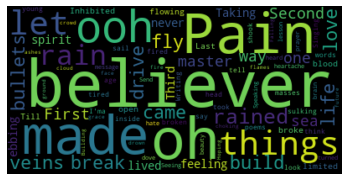

dict_keys(['believer', 'oh', 'Pain', 'made', 'ooh', 'things', 'let', 'rain', 'rained', 'veins', 'break', 'build', 'bullets', 'fly', 'life', 'love', 'drive', 'came', 'First', 'way', 'Second', 'one', 'master', 'sea', 'Taking', 'feeling', 'Third', 'spirit', 'never', 'lived', 'ebbing', 'flowing', 'Inhibited', 'limited', 'Till', 'broke', 'open', 'Last', 'blood', "I'ma", 'say', 'words', 'inside', 'head', 'fired', 'tired', 'tell', 'think', 'sail', 'broken', 'young', 'age', 'sulking', 'masses', 'Writing', 'poems', 'look', 'took', 'shook', 'Singing', 'heartache', 'message', 'Speaking', 'lesson', 'brain', 'Seeing', 'beauty', 'Send', 'prayer', 'hate', 'heard', 'turned', 'dove', 'choking', 'crowd', 'Building', 'cloud', 'Falling', 'ashes', 'ground', 'Hoping', 'drown', 'grace', 'fire', 'flames', 'face', 'future'])
<class 'wordcloud.wordcloud.WordCloud'>


In [15]:
# takes the stopwords set and converts it to both upper and lower
upper_stopwords = [x.upper() for x in STOPWORDS]
lower_stopwords = [x.lower() for x in STOPWORDS]

# combines the upper and lower stopwords
combined_stopwords = upper_stopwords + lower_stopwords

# create and generate a word cloud image

# for each song text generate a wordcloud
for x in song_texts:

    #collocations prevent duplicates
    #stopwords = combined_stopwords
    wordcloud = WordCloud(collocations=False, stopwords=combined_stopwords).generate(x)

    # interpolation makes the image appear smoother
    plt.imshow(wordcloud, interpolation='bilinear')

    # axis makes the words both horizontal and vertical
    plt.axis("off")

    # prints the generated image
    plt.show()
    print(wordcloud.words_.keys())